In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:

AMPs_df = pd.read_pickle('../../datasets/AMPsNonAMPs_df.239.plk')
AMPs_df

,ID,Sequence,length,class,reps
2080,L01A002211|Sequence 1225 from patent US 6573361,MANTKSAIKRIKTIERNRIRNCAYKSVVKTFIKKYLKVLSDYTNAP...,95,0,"[0.006758428644388914, -0.010547993704676628, ..."
2112,ADAM_0164|adam_test,AISYDQVKSSLLPCVGYVRGNNARPAPPNYCKGIRSLKSAARIRLD...,94,0,"[0.009842261672019958, -0.09050261229276657, 0..."
2223,ADAM_4403|adam_test,MKYCVVILALLVALVCITESRSTETGYAVAETLEDNDLDELQAYLE...,93,0,"[0.005940052680671215, -0.01924821361899376, 0..."
2232,ADAM_6138|adam_test,VGSEVSDKRTCVSLTTQRLPVSRIKTYTITEGSLRAVIFITKRGLK...,93,0,"[0.010578776709735394, -0.05168537050485611, 0..."
2315,L01A002317|Sequence 1515 from patent US 6573361,MGRSLKKGPFVAASLLRKIDKLNDKGDKQVVKTWSRASTILPQMVG...,92,0,"[0.004393417853862047, -0.061859458684921265, ..."
...,...,...,...,...,...
41948,UniRef50_A0A2H3S7M8 Uncharacterized protein n=...,MPLAYCSYSYN,11,1,"[0.05190926417708397, 0.029500924050807953, -0..."
41950,UniRef50_A0A2H3SG47 Uncharacterized protein n=...,MASQYGWLNSL,11,1,"[0.05131299048662186, -0.013223196379840374, -..."
42034,UniRef50_A0A0G4N8C6 Uncharacterized protein (F...,ARECSQGGSRP,11,1,"[0.05259896442294121, -0.022827953100204468, -..."
42146,UniRef50_A2NU82 Myeloperoxidase n=1 Tax=Homo s...,MTAAGKGIREQ,11,1,"[0.05165543779730797, -0.025750694796442986, -..."


In [16]:
X= AMPs_df['reps'].to_list()
y= AMPs_df['class'].to_list() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

# Clustering

# RF

# SVM

# Gradient Boosting Classifier

In [58]:
n_estimators=200
original_params = {'n_estimators': 200, 'max_leaf_nodes': 4, 'max_depth': 3, 'random_state': 2,
                   'min_samples_split': 5}

In [37]:
model = GradientBoostingClassifier(n_estimators= 200, max_leaf_nodes= 4, max_depth= 3)
model.fit(X_train, y_train)
# make a single prediction

GradientBoostingClassifier()

In [47]:
# get predition 
pred = model.predict(X_test)
pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.71      0.71      0.71        21

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48

Accuracy:0.75
[[21  6]
 [ 6 15]]


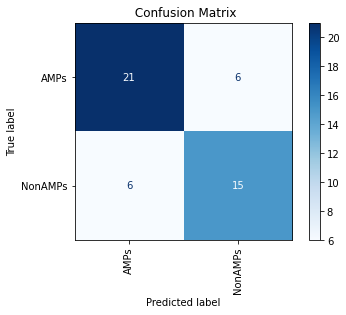

In [42]:

print(classification_report(y_test,pred))
print("Accuracy:"+str(accuracy_score(y_test, pred)))
confusion_Matrix(model, X_test, y_test)

In [66]:
model.train_score_

array([1.220428  , 1.08790822, 0.97140009, 0.87021867, 0.78768887,
       0.71094151, 0.64362654, 0.58466363, 0.54438021, 0.49640413,
       0.46418497, 0.42528316, 0.39916624, 0.36503429, 0.33975462,
       0.31388511, 0.29628066, 0.27652472, 0.25350757, 0.23467956,
       0.2188514 , 0.20538464, 0.19066506, 0.17843663, 0.16816469,
       0.15633453, 0.14627208, 0.1378256 , 0.12768328, 0.11882675,
       0.11112514, 0.10251223, 0.09689684, 0.08994751, 0.08548211,
       0.07912823, 0.07503679, 0.07145196, 0.06639637, 0.06322751,
       0.05946843, 0.05607885, 0.05384032, 0.05064273, 0.04731789,
       0.04405568, 0.0416812 , 0.03984703, 0.03688819, 0.03562037,
       0.03364137, 0.03175756, 0.03023644, 0.02816464, 0.02728195,
       0.02612642, 0.02481803, 0.02308024, 0.02196666, 0.02073802,
       0.01963881, 0.01834362, 0.01769575, 0.01695188, 0.01602829,
       0.0150341 , 0.01424446, 0.01317691, 0.01251841, 0.01189766,
       0.01114593, 0.01052235, 0.01013886, 0.00959687, 0.00904

ValueError: x and y must have same first dimension, but have shapes (200,) and (100,)

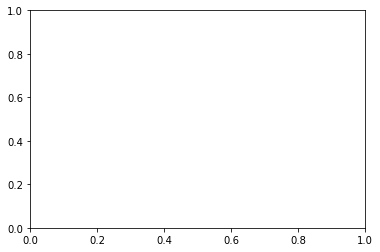

In [71]:
#for pred in est:
#    plt.plot(y_test, pred, color='r', alpha=0.1)
test_score = np.empty(len(model.estimators_))
for i, pred in enumerate(model.staged_predict(X_test)): 
    test_score[i] = model.loss_(y_test, pred) 
    
plt.plot(np.arange(n_estimators) + 1, test_score, label='Test')
#plt.plot(np.arange(n_estimators) + 1, model.train_score_, label='Train')

## Hyperparameter Tuning
hyperparameters to tune, perhaps the most important are as follows:

* The number of trees or estimators in the model.
* The learning rate of the model.
* The row and column sampling rate for stochastic models.
* The maximum tree depth.
* The minimum tree weight.
* The regularization terms alpha and lambda.

How to configure or tune the configuration of gradient boosting algorithm?

In [ ]:
original_params = {'n_estimators': 200, 'max_leaf_nodes': 4, 'max_depth': 3, 'random_state': 2,
                   'min_samples_split': 5}

## Evaluate the model